In [1]:
## VICTOR DICE:
import os
import gc
import time
import json
import requests
import subprocess
import random as rn
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

import socks
import socket
import pymssql
import numpy as np
import pandas as pd
from slugify  import slugify

import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

SEED = int(time.time() / 1000)
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

## >> UTILITARIOS

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stopset = set(stopwords.words("spanish"))
print(stopset)

{'hubiera', 'sobre', 'donde', 'seríamos', 'seas', 'lo', 'ni', 'pero', 'tendréis', 'tenido', 'hayas', 'estuvisteis', 'estará', 'habidos', 'tuvieron', 'están', 'tuviste', 'estarán', 'sea', 'antes', 'él', 'estaríais', 'era', 'sentid', 'somos', 'tendrán', 'le', 'mía', 'o', 'estaríamos', 'estabas', 'habiendo', 'estados', 'he', 'éramos', 'fueras', 'tendrá', 'habré', 'una', 'mucho', 'habíais', 'fui', 'hubiéramos', 'fuiste', 'tuviera', 'habidas', 'desde', 'estuvieron', 'tú', 'tuyos', 'esa', 'tendrían', 'será', 'tuyo', 'tuya', 'sentidos', 'tendré', 'nosotros', 'y', 'hayan', 'hubimos', 'muy', 'estaréis', 'estarías', 'al', 'suyo', 'hubiste', 'tenemos', 'tiene', 'estuviésemos', 'estés', 'hubiésemos', 'sí', 'tuyas', 'suyos', 'contra', 'tengamos', 'te', 'sentida', 'habréis', 'a', 'hay', 'hubieras', 'unos', 'hayamos', 'un', 'tuviesen', 'sería', 'eran', 'fuerais', 'cuando', 'tenida', 'erais', 'fuisteis', 'tuvieran', 'estuve', 'otro', 'serían', 'tuviésemos', 'porque', 'sois', 'es', 'sin', 'les', 'tendr

In [3]:
from unicodedata import normalize, category

def clean_text_1(_text):
    """
        Ll : minusculas
        Zs : espacios
        Lu : mayusculas
        Nd : numeros
        Mn : tildes
        Ps : abre dieresis, .....
        Pe : cierra dieresis, .......
        Pi : abre parentesis, .....
        Po : cierra parentesis, punto, coma, .....        
        ...
    """
    selects_characters = ['Ll', 'Zs', 'Lu']
    
    return ''.join([_.lower() for _ in normalize('NFD', _text.replace(' ', 'ZZZ')) if category(_) in selects_characters])

In [4]:
agents_tor = [
    'Mozilla/5.0 (Windows NT 10.0; rv:78.0) Gecko/20100101 Firefox/78.0'
]

headers_tor = {
    'content-type': "application/x-www-form-urlencoded",
    'User-Agent': rn.choice(agents_tor),
}

letras = "abcdefghijklmnopqrstuvwyz"

def traducir(texto, desde='es', hacia='en'): ### necesita config adicional en tu pc 
    time.sleep(1)
    user_aletorio = ''.join([rn.choice(letras) for _ in range(8)])
    pass_aleatorio = ''.join([rn.choice(letras) for _ in range(8)])
    
    socks.set_default_proxy(socks.SOCKS5, "127.0.0.1", 9150, True, user_aletorio, pass_aleatorio)
    socket.socket = socks.socksocket
    
    headers_tor.update(
        {
            'User-Agent': rn.choice(agents_tor),
            'X-Forwarded-For': requests.get('http://ifconfig.me/ip').text
        }
    )
    
    url_ = 'https://translate.googleapis.com/translate_a/single?client=gtx&sl={}&tl={}&dt=t&q={}'
    response = requests.get(
        url_.format(desde, hacia, texto), headers=headers_tor
    )
    
    return response.json()[0][0][0] if response.status_code == 200 else 'ERROR'

In [5]:
def traducir_simple(texto, desde='es', hacia='en'):

    url_ = 'https://translate.googleapis.com/translate_a/single?client=gtx&sl={}&tl={}&dt=t&q={}'
    response = requests.get(url_.format(desde, hacia, texto))
    
    return response.json()[0][0][0] if response.status_code == 200 else 'ERROR'

## >> TRAFALGAR

In [6]:
obra = requests.get("https://raw.githubusercontent.com/7PartidasDigital/AnaText/master/datos/episodios/01_EN-01-01-Trafalgar.txt").content
obra = obra.decode('utf-8')
obra[:500]

'Se me permitirá que antes de referir el gran suceso de que fui testigo, diga algunas palabras sobre mi infancia, explicando por qué extraña manera me llevaron los azares de la vida a presenciar la terrible catástrofe de nuestra marina. Al hablar de mi nacimiento, no imitaré a la mayor parte de los que cuentan hechos de su propia vida, quienes empiezan nombrando su parentela, las más veces noble, siempre hidalga por lo menos, si no se dicen descendientes del mismo Emperador de Trapisonda. Yo, en '

In [23]:
data = pd.DataFrame(nltk.sent_tokenize(obra))
data.columns = ['oracion']
data['idd'] = data['oracion'].apply(lambda _: slugify(_)[:50])
print(data.shape)

data.head()

(2029, 2)


,oracion,idd
0,"Se me permitirá que antes de referir el gran suceso de que fui testigo, diga algunas palabras sobre mi infancia, explicando por qué extraña manera me llevaron los azares de la vida a presenciar la terrible catástrofe de nuestra marina.",se-me-permitira-que-antes-de-referir-el-gran-suces
1,"Al hablar de mi nacimiento, no imitaré a la mayor parte de los que cuentan hechos de su propia vida, quienes empiezan nombrando su parentela, las más veces noble, siempre hidalga por lo menos, si no se dicen descendientes del mismo Emperador de Trapisonda.",al-hablar-de-mi-nacimiento-no-imitare-a-la-mayor-p
2,"Yo, en esta parte, no puedo adornar mi libro con sonoros apellidos; y fuera de mi madre, a quien conocí por poco tiempo, no tengo noticia de ninguno de mis ascendientes, si no es de Adán, cuyo parentesco me parece indiscutible.",yo-en-esta-parte-no-puedo-adornar-mi-libro-con-son
3,"Doy principio, pues, a mi historia como Pablos, el buscón de Segovia: afortunadamente Dios ha querido que en esto sólo nos parezcamos.",doy-principio-pues-a-mi-historia-como-pablos-el-bu
4,"Yo nací en Cádiz, y en el famoso barrio de la Viña, que no es hoy, ni menos era entonces, academia de buenas costumbres.",yo-naci-en-cadiz-y-en-el-famoso-barrio-de-la-vina-


## >> Traduccion recursiva persistida 

In [58]:
with open("trafalgar.json", "r") as inputfile:
    dicc_traductor = json.loads(inputfile.read())
    
size_initial = len(dicc_traductor)
size_initial

1920

In [59]:
while len([_ for _ in data['idd'].unique() if _ not in dicc_traductor]) > 0:
    try:
        for idd in [_ for _ in data['idd'].unique() if _ not in dicc_traductor]:
            traduction = traducir(data[data['idd'] == idd]['oracion'].values[0])
            if traduction != 'ERROR':
                dicc_traductor[idd] = traduction
            print('.', end=' ')
    
    except Exception as e:
        print("-"*50, str(e))
        time.sleep(30)

. . . . . . 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [55]:
k_del = []
for k, v in dicc_traductor.items():
    if v == 'ERROR':
        k_del.append(k)

for k in k_del:
    del dicc_traductor[k]

In [60]:
len(dicc_traductor)

1925

In [61]:
if len(dicc_traductor) > size_initial:
    tupla = dicc_traductor.items()
    
    with open("trafalgar.json", "w") as outfile:
        json.dump(dicc_traductor, outfile)

## >> AGREGADO DE TRADUCCION A INGLES

In [64]:
data['traducción'] = data['idd'].apply(lambda _: dicc_traductor.get(_, ''))
data.head()

,oracion,idd,traducción
0,"Se me permitirá que antes de referir el gran suceso de que fui testigo, diga algunas palabras sobre mi infancia, explicando por qué extraña manera me llevaron los azares de la vida a presenciar la terrible catástrofe de nuestra marina.",se-me-permitira-que-antes-de-referir-el-gran-suces,"Before referring to the great event I witnessed, I will be allowed to say a few words about my childhood, explaining why strangely the hazards of life led me to witness the terrible catastrophe of our navy."
1,"Al hablar de mi nacimiento, no imitaré a la mayor parte de los que cuentan hechos de su propia vida, quienes empiezan nombrando su parentela, las más veces noble, siempre hidalga por lo menos, si no se dicen descendientes del mismo Emperador de Trapisonda.",al-hablar-de-mi-nacimiento-no-imitare-a-la-mayor-p,"When speaking of my birth, I will not imitate most of those who tell facts about their own lives, who begin by naming their relatives, most of them noble, always noble at least, if they do not call themselves descendants of the Emperor of Trabzon."
2,"Yo, en esta parte, no puedo adornar mi libro con sonoros apellidos; y fuera de mi madre, a quien conocí por poco tiempo, no tengo noticia de ninguno de mis ascendientes, si no es de Adán, cuyo parentesco me parece indiscutible.",yo-en-esta-parte-no-puedo-adornar-mi-libro-con-son,"In this part, I cannot decorate my book with sonorous surnames;"
3,"Doy principio, pues, a mi historia como Pablos, el buscón de Segovia: afortunadamente Dios ha querido que en esto sólo nos parezcamos.",doy-principio-pues-a-mi-historia-como-pablos-el-bu,"So I begin my story as Pablos, the buscón from Segovia: fortunately God has wanted us to only be alike in this."
4,"Yo nací en Cádiz, y en el famoso barrio de la Viña, que no es hoy, ni menos era entonces, academia de buenas costumbres.",yo-naci-en-cadiz-y-en-el-famoso-barrio-de-la-vina-,"I was born in Cádiz, and in the famous neighborhood of La Viña, which is not today, nor was it then, an academy of good customs."


## >> LIMPIEZA STOPWORD EN INGLES

In [65]:
import nltk
from nltk.corpus import stopwords
stopwords_english = stopwords.words('english')

print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [77]:
data['traducción'] = data['traducción'].apply(
    lambda _:  ' '.join([word for word in _.replace(',', '').replace('.', '').replace(';', '').replace(':', '').split()if word not in stopwords_english]).strip()
)

In [78]:
data.head()

,oracion,idd,traducción,sentiment_dict,negativo,positivo,neutro,composicion
0,"Se me permitirá que antes de referir el gran suceso de que fui testigo, diga algunas palabras sobre mi infancia, explicando por qué extraña manera me llevaron los azares de la vida a presenciar la terrible catástrofe de nuestra marina.",se-me-permitira-que-antes-de-referir-el-gran-suces,Before referring great event I witnessed I allowed say words childhood explaining strangely hazards life led witness terrible catastrophe navy,"{'neg': 0.326, 'neu': 0.537, 'pos': 0.138, 'compound': -0.6808}",0.326,0.138,0.537,-0.6808
1,"Al hablar de mi nacimiento, no imitaré a la mayor parte de los que cuentan hechos de su propia vida, quienes empiezan nombrando su parentela, las más veces noble, siempre hidalga por lo menos, si no se dicen descendientes del mismo Emperador de Trapisonda.",al-hablar-de-mi-nacimiento-no-imitare-a-la-mayor-p,When speaking birth I imitate tell facts lives begin naming relatives noble always noble least call descendants Emperor Trabzon,"{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.7184}",0.000,0.261,0.739,0.7184
2,"Yo, en esta parte, no puedo adornar mi libro con sonoros apellidos; y fuera de mi madre, a quien conocí por poco tiempo, no tengo noticia de ninguno de mis ascendientes, si no es de Adán, cuyo parentesco me parece indiscutible.",yo-en-esta-parte-no-puedo-adornar-mi-libro-con-son,In part I cannot decorate book sonorous surnames,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,0.000,1.000,0.0000
3,"Doy principio, pues, a mi historia como Pablos, el buscón de Segovia: afortunadamente Dios ha querido que en esto sólo nos parezcamos.",doy-principio-pues-a-mi-historia-como-pablos-el-bu,So I begin story Pablos buscón Segovia fortunately God wanted us alike,"{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2732}",0.000,0.160,0.840,0.2732
4,"Yo nací en Cádiz, y en el famoso barrio de la Viña, que no es hoy, ni menos era entonces, academia de buenas costumbres.",yo-naci-en-cadiz-y-en-el-famoso-barrio-de-la-vina-,I born Cádiz famous neighborhood La Viña today academy good customs,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}",0.000,0.225,0.775,0.4404


## >> POLARIDAD

In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

data['sentiment_dict'] = data['traducción'].apply(lambda _: analyser.polarity_scores(_))
data['sentiment_dict'].head()

0    {'neg': 0.326, 'neu': 0.537, 'pos': 0.138, 'compound': -0.6808}
1    {'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.7184}   
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}          
3    {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2732}     
4    {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}   
Name: sentiment_dict, dtype: object

In [80]:
data['negativo'] = data['sentiment_dict'].apply(lambda _: _.get('neg', 0))
data['positivo'] = data['sentiment_dict'].apply(lambda _: _.get('pos', 0))
data['neutro'] = data['sentiment_dict'].apply(lambda _: _.get('neu', 0))
data['composicion'] = data['sentiment_dict'].apply(lambda _: _.get('compound', 0))

## >> Vistazo de histograma de polaridad

<AxesSubplot:>

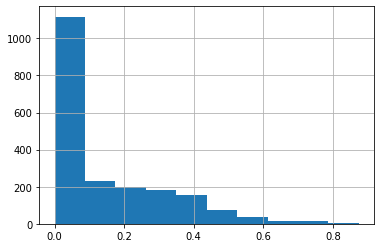

In [81]:
data['negativo'].hist()

<AxesSubplot:>

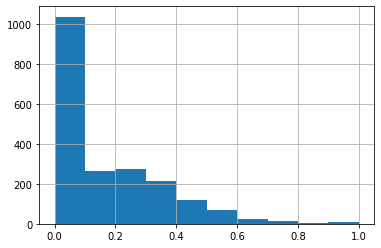

In [82]:
data['positivo'].hist()

<AxesSubplot:>

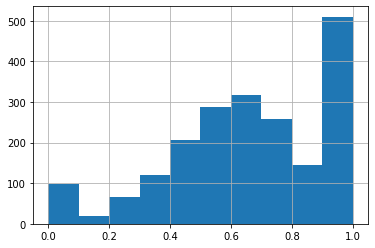

In [83]:
data['neutro'].hist()

<AxesSubplot:>

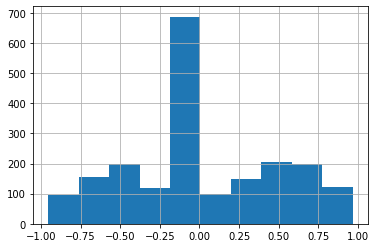

In [84]:
data['composicion'].hist()

## CORRELACION

In [85]:
data[['neutro', 'positivo', 'negativo', 'composicion']].corr(
    method='spearman').style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,neutro,positivo,negativo,composicion
neutro,1.000,-0.506,-0.479,-0.023
positivo,-0.506,1.000,-0.077,0.686
negativo,-0.479,-0.077,1.000,-0.636
composicion,-0.023,0.686,-0.636,1.000


In [86]:
data.head()

,oracion,idd,traducción,sentiment_dict,negativo,positivo,neutro,composicion
0,"Se me permitirá que antes de referir el gran suceso de que fui testigo, diga algunas palabras sobre mi infancia, explicando por qué extraña manera me llevaron los azares de la vida a presenciar la terrible catástrofe de nuestra marina.",se-me-permitira-que-antes-de-referir-el-gran-suces,Before referring great event I witnessed I allowed say words childhood explaining strangely hazards life led witness terrible catastrophe navy,"{'neg': 0.326, 'neu': 0.537, 'pos': 0.138, 'compound': -0.6808}",0.326,0.138,0.537,-0.6808
1,"Al hablar de mi nacimiento, no imitaré a la mayor parte de los que cuentan hechos de su propia vida, quienes empiezan nombrando su parentela, las más veces noble, siempre hidalga por lo menos, si no se dicen descendientes del mismo Emperador de Trapisonda.",al-hablar-de-mi-nacimiento-no-imitare-a-la-mayor-p,When speaking birth I imitate tell facts lives begin naming relatives noble always noble least call descendants Emperor Trabzon,"{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.7184}",0.000,0.261,0.739,0.7184
2,"Yo, en esta parte, no puedo adornar mi libro con sonoros apellidos; y fuera de mi madre, a quien conocí por poco tiempo, no tengo noticia de ninguno de mis ascendientes, si no es de Adán, cuyo parentesco me parece indiscutible.",yo-en-esta-parte-no-puedo-adornar-mi-libro-con-son,In part I cannot decorate book sonorous surnames,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,0.000,1.000,0.0000
3,"Doy principio, pues, a mi historia como Pablos, el buscón de Segovia: afortunadamente Dios ha querido que en esto sólo nos parezcamos.",doy-principio-pues-a-mi-historia-como-pablos-el-bu,So I begin story Pablos buscón Segovia fortunately God wanted us alike,"{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2732}",0.000,0.160,0.840,0.2732
4,"Yo nací en Cádiz, y en el famoso barrio de la Viña, que no es hoy, ni menos era entonces, academia de buenas costumbres.",yo-naci-en-cadiz-y-en-el-famoso-barrio-de-la-vina-,I born Cádiz famous neighborhood La Viña today academy good customs,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}",0.000,0.225,0.775,0.4404


## >> Palabras por oración

In [87]:
data['words'] = data['traducción'].apply(lambda _: len(_.split()))

In [89]:
data[['words','neutro', 'positivo', 'negativo', 'composicion']].corr(
    method='spearman').style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,words,neutro,positivo,negativo,composicion
words,1.000,0.020,0.286,0.278,0.081
neutro,0.020,1.000,-0.506,-0.479,-0.023
positivo,0.286,-0.506,1.000,-0.077,0.686
negativo,0.278,-0.479,-0.077,1.000,-0.636
composicion,0.081,-0.023,0.686,-0.636,1.000


## >> Opcional no usado EMOJIS

### Conversion de emojis y/o emoticones ---> significado

In [ ]:
import emot

text = ':-) Woohooo😍✌️'

def clean_mean(val):
    return val.replace('_', ' ').replace('-', ' ').replace(':', ' ')

def handle_emoji_emoti(text):
    for emoti in emot.emo_unicode.EMOTICONS:
        if emoti in text:
            text = text.replace(emoti, ' ' + clean_mean(emot.emo_unicode.EMOTICONS.get(emoti, '')))
            print(emoti, end=' ')

    for emoti in emot.emo_unicode.UNICODE_EMO:
        if emoti in text:
            text = text.replace(emoti, ' ' + clean_mean(emot.emo_unicode.UNICODE_EMO.get(emoti, '')))
            print(emoti, end=' ')

    for emoti in emot.emo_unicode.EMOTICONS_EMO:
        if emoti in text:
            text = text.replace(emoti, ' ' + clean_mean(emot.emo_unicode.EMOTICONS_EMO.get(emoti, '')))
            print(emoti, end=' ')
        
    return text
        
text = handle_emoji_emoti(text)
print(text)